In [ ]:
#!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip --user

In [ ]:
#!pip install tensorflow_probability 

In [ ]:
#tf nightly only version of tf 2.0 with tensorboard support
#!pip install tf-nightly --user

In [ ]:
#data from https://www.kaggle.com/mlg-ulb/creditcardfraud

In [ ]:
#open tensorboard
#!python -m tensorboard.main --logdir=/path/to/logs


In [21]:
import pandas as pd
import h2o
import pandas_profiling
from pandas_profiling import ProfileReport
from h2o.estimators.deeplearning import H2OAutoEncoderEstimator, H2ODeepLearningEstimator
import matplotlib.pyplot as plt
import tensorflow_probability as tfp
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import TensorBoard
import os
import matplotlib.pyplot as plt
SEED=42


In [45]:
plt.style.use('ggplot')

def plot_history(history):
    mean_absolute_error = history['mean_absolute_error']
   
    loss = history['loss']
    
    x = range(1, len(mean_absolute_error) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, mean_absolute_error, 'r', label='Training error')
    plt.title('Loss and accuracy')
    plt.legend()
    
    

In [2]:
df=pd.read_csv("creditcard.csv")

In [ ]:
profile = ProfileReport(df, title='Pandas Profiling Report', html={'style':{'full_width':True}},plot ={'histogram':{'bayesian_blocks_bins': False}})

In [ ]:
profile.to_file(output_file="credit_report.html")

In [3]:

h2o.init(min_mem_size='20G')

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.241-b07, mixed mode)
  Starting server from C:\Users\Michael Lanier\AppData\Local\Continuum\anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\MICHAE~1\AppData\Local\Temp\tmpsk9sqaot
  JVM stdout: C:\Users\MICHAE~1\AppData\Local\Temp\tmpsk9sqaot\h2o_Michael_Lanier_started_from_python.out
  JVM stderr: C:\Users\MICHAE~1\AppData\Local\Temp\tmpsk9sqaot\h2o_Michael_Lanier_started_from_python.err
  Server is running at http://127.0.0.1:54387
Connecting to H2O server at http://127.0.0.1:54387 ... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,America/Chicago
H2O data parsing timezone:,UTC
H2O cluster version:,3.28.0.3
H2O cluster version age:,26 days
H2O cluster name:,H2O_from_python_Michael_Lanier_xsqbo5
H2O cluster total nodes:,1
H2O cluster free memory:,19.17 Gb
H2O cluster total cores:,12
H2O cluster allowed cores:,12
H2O cluster status:,"accepting new members, healthy"


In [4]:
data=h2o.import_file("creditcard.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [5]:
data

Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.35981,-0.0727812,2.53635,1.37816,-0.338321,0.462388,0.239599,0.0986979,0.363787,0.0907942,-0.5516,-0.617801,-0.99139,-0.311169,1.46818,-0.470401,0.207971,0.0257906,0.403993,0.251412,-0.0183068,0.277838,-0.110474,0.0669281,0.128539,-0.189115,0.133558,-0.0210531,149.62,0
0,1.19186,0.266151,0.16648,0.448154,0.0600176,-0.0823608,-0.078803,0.0851017,-0.255425,-0.166974,1.61273,1.06524,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.0690831,-0.225775,-0.638672,0.101288,-0.339846,0.16717,0.125895,-0.0089831,0.0147242,2.69,0
1,-1.35835,-1.34016,1.77321,0.37978,-0.503198,1.8005,0.791461,0.247676,-1.51465,0.207643,0.624501,0.0660837,0.717293,-0.165946,2.34586,-2.89008,1.10997,-0.121359,-2.26186,0.52498,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.0553528,-0.0597518,378.66,0
1,-0.966272,-0.185226,1.79299,-0.863291,-0.0103089,1.2472,0.237609,0.377436,-1.38702,-0.0549519,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.05965,-0.684093,1.96578,-1.23262,-0.208038,-0.1083,0.0052736,-0.190321,-1.17558,0.647376,-0.221929,0.0627228,0.0614576,123.5,0
2,-1.15823,0.877737,1.54872,0.403034,-0.407193,0.0959215,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.34585,-1.11967,0.175121,-0.451449,-0.237033,-0.0381948,0.803487,0.408542,-0.0094307,0.798278,-0.137458,0.141267,-0.20601,0.502292,0.219422,0.215153,69.99,0
2,-0.425966,0.960523,1.14111,-0.168252,0.420987,-0.0297276,0.476201,0.260314,-0.568671,-0.371407,1.34126,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.0581328,0.0686531,-0.0331938,0.0849677,-0.208254,-0.559825,-0.0263977,-0.371427,-0.232794,0.105915,0.253844,0.0810803,3.67,0
4,1.22966,0.141004,0.0453708,1.20261,0.191881,0.272708,-0.005159,0.0812129,0.46496,-0.0992543,-1.41691,-0.153826,-0.751063,0.167372,0.0501436,-0.443587,0.00282051,-0.611987,-0.045575,-0.219633,-0.167716,-0.27071,-0.154104,-0.780055,0.750137,-0.257237,0.0345074,0.00516777,4.99,0
7,-0.644269,1.41796,1.07438,-0.492199,0.948934,0.428118,1.12063,-3.80786,0.615375,1.24938,-0.619468,0.291474,1.75796,-1.32387,0.686133,-0.076127,-1.22213,-0.358222,0.324505,-0.156742,1.94347,-1.01545,0.0575035,-0.649709,-0.415267,-0.0516343,-1.20692,-1.08534,40.8,0
7,-0.894286,0.286157,-0.113192,-0.271526,2.6696,3.72182,0.370145,0.851084,-0.392048,-0.41043,-0.705117,-0.110452,-0.286254,0.0743554,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.0527357,-0.0734251,-0.268092,-0.204233,1.01159,0.373205,-0.384157,0.0117474,0.142404,93.2,0
9,-0.338262,1.11959,1.04437,-0.222187,0.499361,-0.246761,0.651583,0.0695386,-0.736727,-0.366846,1.01761,0.83639,1.00684,-0.443523,0.150219,0.739453,-0.54098,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.38505,-0.069733,0.0941988,0.246219,0.0830756,3.68,0


In [5]:
x=data.columns
C=data['Class']
x.remove('Class')


In [7]:
fraud_dl =H2OAutoEncoderEstimator(hidden = [10,10], epochs = 10, activation='Tanh',seed=SEED)



fraud_anon = fraud_dl.train(x=x,training_frame=data)


deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [8]:
fraud_dl

Model Details
H2OAutoEncoderEstimator :  Deep Learning
Model Key:  DeepLearning_model_python_1583265108361_1


Status of Neuron Layers: auto-encoder, gaussian distribution, Quadratic loss, 750 weights/biases, 17.5 KB, 2,900,834 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,30,Input,0,,,,,,,,,
1,,2,10,Tanh,0,0,0,0.916679,0.123343,0,-0.0564346,0.76846,0.0310582,0.102191
2,,3,10,Tanh,0,0,0,0.173866,0.0462812,0,-0.0117232,0.204373,0.0132583,0.0265792
3,,4,30,Tanh,,0,0,0.0719483,0.0374355,0,0.00205727,0.0928818,0.000803051,0.0145809




ModelMetricsAutoEncoder: deeplearning
** Reported on train data. **

MSE: 0.0004116648029518689
RMSE: 0.020289524463423702

Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_mse
0,,2020-03-03 13:51:54,1.195 sec,0.00000 obs/sec,0.000000,0,0.0,0.090335,0.008160
1,,2020-03-03 13:51:59,6.243 sec,139664 obs/sec,2.458293,7,700139.0,0.022185,0.000492
2,,2020-03-03 13:52:04,11.686 sec,162756 obs/sec,5.970067,17,1700317.0,0.020290,0.000412
3,,2020-03-03 13:52:10,17.174 sec,169594 obs/sec,9.483461,27,2700956.0,0.022212,0.000493
4,,2020-03-03 13:52:11,18.302 sec,170256 obs/sec,10.185262,29,2900834.0,0.040605,0.001649
5,,2020-03-03 13:52:11,18.302 sec,170256 obs/sec,10.185262,29,2900834.0,0.020290,0.000412



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,V9,1.000000,1.000000,0.105444
1,V18,0.924705,0.924705,0.097505
2,V19,0.902420,0.902420,0.095155
3,V11,0.890820,0.890820,0.093932
4,V26,0.798231,0.798231,0.084169
5,V24,0.786382,0.786382,0.082920
6,V13,0.754941,0.754941,0.079604
7,V15,0.748175,0.748175,0.078891
8,V4,0.648272,0.648272,0.068357
9,Time,0.609149,0.609149,0.064231



See the whole table with table.as_data_frame()


In [9]:
sh = fraud_dl.score_history()


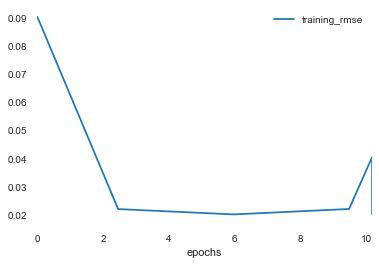

In [10]:
%matplotlib inline 
# plot training logloss and auc
sh.plot(x='epochs', y = ['training_rmse'])

In [11]:
err=(fraud_dl.anomaly(data)).cbind(C)

In [12]:
err

Reconstruction.MSE,Class
0.000634413,0
0.000728842,0
0.00113408,0
0.000799521,0
0.000790778,0
0.000651383,0
0.000783297,0
0.00107167,0
0.000689716,0
0.000678911,0


In [13]:
err=err.as_data_frame()

In [14]:
err=tf.cast(err.values, tf.float32)

In [15]:
np.average(err[:,0])

0.00039916404

In [16]:
#find correlation between reconstruction error and fraud flag

tfp.stats.correlation(
    err, y=None, sample_axis=0, event_axis=-1, keepdims=False, name=None
)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0.9999999, 0.4647785],
       [0.4647785, 0.9999914]], dtype=float32)>

In [17]:
#fit a glm to access if reconstruction error is a predictor of fraud

tfp.glm.fit(
    model_matrix=err, response=err[:,1], model=tfp.glm.Bernoulli(), model_coefficients_start=None,
    predicted_linear_response_start=None, l2_regularizer=None, dispersion=None,
    offset=None, convergence_criteria_fn=None, learning_rate=None,
    fast_unsafe_numerics=True, maximum_iterations=1,
    l2_regularization_penalty_factor=None, name=None
)

[<tf.Tensor: shape=(2,), dtype=float32, numpy=array([-460.6818  ,    9.247124], dtype=float32)>,
 <tf.Tensor: shape=(284807,), dtype=float32, numpy=
 array([-0.29226264, -0.33576432, -0.52244836, ..., -0.08025674,
        -0.0844292 , -0.05196166], dtype=float32)>,
 <tf.Tensor: shape=(), dtype=bool, numpy=False>,
 <tf.Tensor: shape=(), dtype=int32, numpy=1>]

In [18]:
def logit2prob(logit):
  odds = tf.exp(logit)
  prob = odds / (1.000 + odds)
  return(prob)
logit2prob(9.148)

<tf.Tensor: shape=(), dtype=float32, numpy=0.9998936>

In [6]:
data=data.scale(center=True,scale=True)
data=np.array(data[:,x].as_data_frame())

In [7]:
data.shape

(284807, 30)

In [17]:
nb_epoch = 3
batch_size = 128
input_dim = data.shape[1] #num of columns, 30
encoding_dim = 10
hidden_dim = 10 
learning_rate = 1e-7

input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="tanh", activity_regularizer=regularizers.l1(learning_rate))(input_layer)
encoder = Dense(hidden_dim, activation="tanh")(encoder)
decoder = Dense(hidden_dim, activation='tanh')(encoder)
decoder = Dense(input_dim, activation='tanh')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)

In [18]:
logdir="C:\\Users\\Michael Lanier\\notebook\\logs"
#!mkdir 'C:\\Users\\Michael Lanier\\notebook\\logs\\train'
#!tensorboard --logdir "C:\Users\Michael Lanier\notebook\logs"

In [19]:

autoencoder.compile(metrics=['mean_absolute_error'],
                    loss='mean_squared_error',
                    optimizer='adam')

cp = ModelCheckpoint(filepath="autoencoder_fraud.h5",
                               #save_best_only=True,
                               verbose=1)

tb = TensorBoard(log_dir=logdir,
                histogram_freq=0,
                write_graph=True,
                write_images=True,
                profile_batch=2000000)

history = autoencoder.fit(data, data,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    verbose=1,
                    callbacks=[cp, tb]).history

Train on 284807 samples
Epoch 1/3


 63424/284807 [=====>........................] - ETA: 39:47 - loss: 0.8717 - mean_absolute_error: 0.69 - ETA: 4:19 - loss: 1.3678 - mean_absolute_error: 0.7212 - ETA: 2:23 - loss: 1.1367 - mean_absolute_error: 0.707 - ETA: 1:39 - loss: 1.0392 - mean_absolute_error: 0.695 - ETA: 1:21 - loss: 1.0870 - mean_absolute_error: 0.698 - ETA: 1:09 - loss: 1.0412 - mean_absolute_error: 0.687 - ETA: 1:03 - loss: 1.0159 - mean_absolute_error: 0.678 - ETA: 57s - loss: 0.9839 - mean_absolute_error: 0.672 - ETA: 54s - loss: 0.9717 - mean_absolute_error: 0.66 - ETA: 52s - loss: 1.0035 - mean_absolute_error: 0.66 - ETA: 50s - loss: 0.9850 - mean_absolute_error: 0.66 - ETA: 49s - loss: 0.9636 - mean_absolute_error: 0.65 - ETA: 48s - loss: 0.9441 - mean_absolute_error: 0.65 - ETA: 47s - loss: 0.9323 - mean_absolute_error: 0.64 - ETA: 46s - loss: 0.9395 - mean_absolute_error: 0.64 - ETA: 46s - loss: 0.9295 - mean_absolute_error: 0.64 - ETA: 45s - loss: 0.9192 - mean_absolute_error: 0.64 - ETA: 45s - loss: 

128928/284807 [============>.................] - ETA: 27s - loss: 0.7509 - mean_absolute_error: 0.54 - ETA: 27s - loss: 0.7497 - mean_absolute_error: 0.54 - ETA: 27s - loss: 0.7494 - mean_absolute_error: 0.54 - ETA: 27s - loss: 0.7509 - mean_absolute_error: 0.54 - ETA: 27s - loss: 0.7505 - mean_absolute_error: 0.54 - ETA: 27s - loss: 0.7494 - mean_absolute_error: 0.54 - ETA: 27s - loss: 0.7488 - mean_absolute_error: 0.54 - ETA: 27s - loss: 0.7494 - mean_absolute_error: 0.54 - ETA: 27s - loss: 0.7484 - mean_absolute_error: 0.54 - ETA: 27s - loss: 0.7475 - mean_absolute_error: 0.54 - ETA: 27s - loss: 0.7478 - mean_absolute_error: 0.54 - ETA: 27s - loss: 0.7482 - mean_absolute_error: 0.54 - ETA: 27s - loss: 0.7474 - mean_absolute_error: 0.54 - ETA: 27s - loss: 0.7501 - mean_absolute_error: 0.54 - ETA: 27s - loss: 0.7493 - mean_absolute_error: 0.54 - ETA: 26s - loss: 0.7488 - mean_absolute_error: 0.54 - ETA: 26s - loss: 0.7484 - mean_absolute_error: 0.54 - ETA: 26s - loss: 0.7476 - mean_ab

195808/284807 [===================>..........] - ETA: 19s - loss: 0.7288 - mean_absolute_error: 0.52 - ETA: 18s - loss: 0.7287 - mean_absolute_error: 0.52 - ETA: 18s - loss: 0.7279 - mean_absolute_error: 0.52 - ETA: 18s - loss: 0.7286 - mean_absolute_error: 0.52 - ETA: 18s - loss: 0.7291 - mean_absolute_error: 0.52 - ETA: 18s - loss: 0.7281 - mean_absolute_error: 0.52 - ETA: 18s - loss: 0.7280 - mean_absolute_error: 0.52 - ETA: 18s - loss: 0.7278 - mean_absolute_error: 0.52 - ETA: 18s - loss: 0.7279 - mean_absolute_error: 0.52 - ETA: 18s - loss: 0.7278 - mean_absolute_error: 0.52 - ETA: 18s - loss: 0.7272 - mean_absolute_error: 0.52 - ETA: 18s - loss: 0.7269 - mean_absolute_error: 0.52 - ETA: 18s - loss: 0.7266 - mean_absolute_error: 0.52 - ETA: 18s - loss: 0.7258 - mean_absolute_error: 0.52 - ETA: 18s - loss: 0.7259 - mean_absolute_error: 0.52 - ETA: 18s - loss: 0.7252 - mean_absolute_error: 0.52 - ETA: 18s - loss: 0.7253 - mean_absolute_error: 0.52 - ETA: 17s - loss: 0.7248 - mean_ab

262432/284807 [==========================>...] - ETA: 10s - loss: 0.7037 - mean_absolute_error: 0.50 - ETA: 10s - loss: 0.7040 - mean_absolute_error: 0.50 - ETA: 10s - loss: 0.7037 - mean_absolute_error: 0.50 - ETA: 10s - loss: 0.7033 - mean_absolute_error: 0.50 - ETA: 10s - loss: 0.7032 - mean_absolute_error: 0.50 - ETA: 10s - loss: 0.7026 - mean_absolute_error: 0.50 - ETA: 10s - loss: 0.7028 - mean_absolute_error: 0.50 - ETA: 10s - loss: 0.7025 - mean_absolute_error: 0.50 - ETA: 10s - loss: 0.7023 - mean_absolute_error: 0.50 - ETA: 10s - loss: 0.7018 - mean_absolute_error: 0.50 - ETA: 10s - loss: 0.7017 - mean_absolute_error: 0.50 - ETA: 10s - loss: 0.7015 - mean_absolute_error: 0.50 - ETA: 9s - loss: 0.7012 - mean_absolute_error: 0.5060 - ETA: 9s - loss: 0.7007 - mean_absolute_error: 0.505 - ETA: 9s - loss: 0.7003 - mean_absolute_error: 0.505 - ETA: 9s - loss: 0.7000 - mean_absolute_error: 0.505 - ETA: 9s - loss: 0.7000 - mean_absolute_error: 0.505 - ETA: 9s - loss: 0.6997 - mean_ab

284768/284807 [============================>.] - ETA: 2s - loss: 0.6906 - mean_absolute_error: 0.497 - ETA: 2s - loss: 0.6904 - mean_absolute_error: 0.497 - ETA: 2s - loss: 0.6901 - mean_absolute_error: 0.497 - ETA: 2s - loss: 0.6896 - mean_absolute_error: 0.497 - ETA: 2s - loss: 0.6892 - mean_absolute_error: 0.497 - ETA: 2s - loss: 0.6890 - mean_absolute_error: 0.497 - ETA: 2s - loss: 0.6887 - mean_absolute_error: 0.497 - ETA: 2s - loss: 0.6885 - mean_absolute_error: 0.497 - ETA: 2s - loss: 0.6883 - mean_absolute_error: 0.497 - ETA: 2s - loss: 0.6881 - mean_absolute_error: 0.497 - ETA: 2s - loss: 0.6880 - mean_absolute_error: 0.497 - ETA: 1s - loss: 0.6878 - mean_absolute_error: 0.496 - ETA: 1s - loss: 0.6879 - mean_absolute_error: 0.496 - ETA: 1s - loss: 0.6877 - mean_absolute_error: 0.496 - ETA: 1s - loss: 0.6875 - mean_absolute_error: 0.496 - ETA: 1s - loss: 0.6875 - mean_absolute_error: 0.496 - ETA: 1s - loss: 0.6873 - mean_absolute_error: 0.496 - ETA: 1s - loss: 0.6873 - mean_abs

 67744/284807 [======>.......................] - ETA: 44s - loss: 0.3410 - mean_absolute_error: 0.42 - ETA: 36s - loss: 0.6763 - mean_absolute_error: 0.45 - ETA: 37s - loss: 0.6073 - mean_absolute_error: 0.45 - ETA: 35s - loss: 0.6085 - mean_absolute_error: 0.46 - ETA: 35s - loss: 0.6245 - mean_absolute_error: 0.46 - ETA: 35s - loss: 0.6217 - mean_absolute_error: 0.46 - ETA: 34s - loss: 0.5950 - mean_absolute_error: 0.46 - ETA: 34s - loss: 0.5875 - mean_absolute_error: 0.46 - ETA: 34s - loss: 0.6083 - mean_absolute_error: 0.46 - ETA: 34s - loss: 0.6517 - mean_absolute_error: 0.47 - ETA: 34s - loss: 0.6775 - mean_absolute_error: 0.47 - ETA: 33s - loss: 0.6654 - mean_absolute_error: 0.47 - ETA: 33s - loss: 0.6558 - mean_absolute_error: 0.47 - ETA: 33s - loss: 0.6702 - mean_absolute_error: 0.47 - ETA: 33s - loss: 0.6875 - mean_absolute_error: 0.47 - ETA: 33s - loss: 0.6761 - mean_absolute_error: 0.47 - ETA: 33s - loss: 0.6690 - mean_absolute_error: 0.47 - ETA: 33s - loss: 0.6692 - mean_ab

135680/284807 [=============>................] - ETA: 30s - loss: 0.6256 - mean_absolute_error: 0.46 - ETA: 29s - loss: 0.6251 - mean_absolute_error: 0.46 - ETA: 29s - loss: 0.6259 - mean_absolute_error: 0.46 - ETA: 29s - loss: 0.6255 - mean_absolute_error: 0.46 - ETA: 29s - loss: 0.6262 - mean_absolute_error: 0.46 - ETA: 29s - loss: 0.6249 - mean_absolute_error: 0.46 - ETA: 29s - loss: 0.6249 - mean_absolute_error: 0.46 - ETA: 29s - loss: 0.6237 - mean_absolute_error: 0.46 - ETA: 29s - loss: 0.6227 - mean_absolute_error: 0.46 - ETA: 29s - loss: 0.6226 - mean_absolute_error: 0.46 - ETA: 28s - loss: 0.6217 - mean_absolute_error: 0.46 - ETA: 28s - loss: 0.6226 - mean_absolute_error: 0.46 - ETA: 28s - loss: 0.6222 - mean_absolute_error: 0.46 - ETA: 28s - loss: 0.6211 - mean_absolute_error: 0.46 - ETA: 28s - loss: 0.6205 - mean_absolute_error: 0.46 - ETA: 28s - loss: 0.6195 - mean_absolute_error: 0.46 - ETA: 28s - loss: 0.6196 - mean_absolute_error: 0.46 - ETA: 28s - loss: 0.6197 - mean_ab

201856/284807 [====================>.........] - ETA: 18s - loss: 0.6218 - mean_absolute_error: 0.46 - ETA: 18s - loss: 0.6221 - mean_absolute_error: 0.46 - ETA: 18s - loss: 0.6219 - mean_absolute_error: 0.46 - ETA: 18s - loss: 0.6229 - mean_absolute_error: 0.46 - ETA: 18s - loss: 0.6224 - mean_absolute_error: 0.46 - ETA: 18s - loss: 0.6223 - mean_absolute_error: 0.46 - ETA: 18s - loss: 0.6221 - mean_absolute_error: 0.46 - ETA: 18s - loss: 0.6222 - mean_absolute_error: 0.46 - ETA: 18s - loss: 0.6224 - mean_absolute_error: 0.46 - ETA: 18s - loss: 0.6222 - mean_absolute_error: 0.46 - ETA: 18s - loss: 0.6228 - mean_absolute_error: 0.46 - ETA: 18s - loss: 0.6222 - mean_absolute_error: 0.46 - ETA: 18s - loss: 0.6215 - mean_absolute_error: 0.46 - ETA: 18s - loss: 0.6214 - mean_absolute_error: 0.46 - ETA: 17s - loss: 0.6212 - mean_absolute_error: 0.46 - ETA: 17s - loss: 0.6220 - mean_absolute_error: 0.46 - ETA: 17s - loss: 0.6219 - mean_absolute_error: 0.46 - ETA: 17s - loss: 0.6220 - mean_ab

269920/284807 [===========================>..] - ETA: 10s - loss: 0.6326 - mean_absolute_error: 0.46 - ETA: 10s - loss: 0.6324 - mean_absolute_error: 0.46 - ETA: 10s - loss: 0.6322 - mean_absolute_error: 0.46 - ETA: 10s - loss: 0.6322 - mean_absolute_error: 0.46 - ETA: 10s - loss: 0.6324 - mean_absolute_error: 0.46 - ETA: 9s - loss: 0.6324 - mean_absolute_error: 0.4658 - ETA: 9s - loss: 0.6320 - mean_absolute_error: 0.465 - ETA: 9s - loss: 0.6318 - mean_absolute_error: 0.465 - ETA: 9s - loss: 0.6315 - mean_absolute_error: 0.465 - ETA: 9s - loss: 0.6316 - mean_absolute_error: 0.465 - ETA: 9s - loss: 0.6312 - mean_absolute_error: 0.465 - ETA: 9s - loss: 0.6312 - mean_absolute_error: 0.465 - ETA: 9s - loss: 0.6310 - mean_absolute_error: 0.465 - ETA: 9s - loss: 0.6316 - mean_absolute_error: 0.465 - ETA: 9s - loss: 0.6315 - mean_absolute_error: 0.465 - ETA: 9s - loss: 0.6313 - mean_absolute_error: 0.465 - ETA: 9s - loss: 0.6311 - mean_absolute_error: 0.465 - ETA: 9s - loss: 0.6308 - mean_ab

284672/284807 [============================>.] - ETA: 1s - loss: 0.6315 - mean_absolute_error: 0.463 - ETA: 1s - loss: 0.6313 - mean_absolute_error: 0.463 - ETA: 1s - loss: 0.6314 - mean_absolute_error: 0.463 - ETA: 1s - loss: 0.6312 - mean_absolute_error: 0.463 - ETA: 1s - loss: 0.6310 - mean_absolute_error: 0.463 - ETA: 1s - loss: 0.6310 - mean_absolute_error: 0.463 - ETA: 1s - loss: 0.6308 - mean_absolute_error: 0.463 - ETA: 1s - loss: 0.6307 - mean_absolute_error: 0.463 - ETA: 1s - loss: 0.6304 - mean_absolute_error: 0.463 - ETA: 1s - loss: 0.6307 - mean_absolute_error: 0.463 - ETA: 1s - loss: 0.6304 - mean_absolute_error: 0.463 - ETA: 1s - loss: 0.6303 - mean_absolute_error: 0.463 - ETA: 1s - loss: 0.6307 - mean_absolute_error: 0.463 - ETA: 1s - loss: 0.6306 - mean_absolute_error: 0.463 - ETA: 0s - loss: 0.6307 - mean_absolute_error: 0.463 - ETA: 0s - loss: 0.6304 - mean_absolute_error: 0.463 - ETA: 0s - loss: 0.6303 - mean_absolute_error: 0.463 - ETA: 0s - loss: 0.6303 - mean_abs

 65184/284807 [=====>........................] - ETA: 44s - loss: 0.3280 - mean_absolute_error: 0.40 - ETA: 41s - loss: 0.7095 - mean_absolute_error: 0.47 - ETA: 35s - loss: 0.6423 - mean_absolute_error: 0.45 - ETA: 34s - loss: 0.5929 - mean_absolute_error: 0.45 - ETA: 33s - loss: 0.5760 - mean_absolute_error: 0.45 - ETA: 32s - loss: 0.6250 - mean_absolute_error: 0.46 - ETA: 31s - loss: 0.6196 - mean_absolute_error: 0.45 - ETA: 31s - loss: 0.6037 - mean_absolute_error: 0.45 - ETA: 31s - loss: 0.5980 - mean_absolute_error: 0.45 - ETA: 32s - loss: 0.5935 - mean_absolute_error: 0.45 - ETA: 32s - loss: 0.5869 - mean_absolute_error: 0.45 - ETA: 32s - loss: 0.5906 - mean_absolute_error: 0.45 - ETA: 31s - loss: 0.5852 - mean_absolute_error: 0.45 - ETA: 31s - loss: 0.5735 - mean_absolute_error: 0.45 - ETA: 31s - loss: 0.5996 - mean_absolute_error: 0.45 - ETA: 31s - loss: 0.6045 - mean_absolute_error: 0.45 - ETA: 31s - loss: 0.6140 - mean_absolute_error: 0.45 - ETA: 31s - loss: 0.6112 - mean_ab

129792/284807 [============>.................] - ETA: 26s - loss: 0.6036 - mean_absolute_error: 0.45 - ETA: 26s - loss: 0.6031 - mean_absolute_error: 0.45 - ETA: 25s - loss: 0.6027 - mean_absolute_error: 0.45 - ETA: 25s - loss: 0.6024 - mean_absolute_error: 0.45 - ETA: 25s - loss: 0.6018 - mean_absolute_error: 0.45 - ETA: 25s - loss: 0.6015 - mean_absolute_error: 0.45 - ETA: 25s - loss: 0.6039 - mean_absolute_error: 0.45 - ETA: 25s - loss: 0.6031 - mean_absolute_error: 0.45 - ETA: 25s - loss: 0.6023 - mean_absolute_error: 0.45 - ETA: 25s - loss: 0.6244 - mean_absolute_error: 0.45 - ETA: 25s - loss: 0.6247 - mean_absolute_error: 0.45 - ETA: 25s - loss: 0.6241 - mean_absolute_error: 0.45 - ETA: 25s - loss: 0.6230 - mean_absolute_error: 0.45 - ETA: 25s - loss: 0.6234 - mean_absolute_error: 0.45 - ETA: 25s - loss: 0.6226 - mean_absolute_error: 0.45 - ETA: 25s - loss: 0.6228 - mean_absolute_error: 0.45 - ETA: 25s - loss: 0.6218 - mean_absolute_error: 0.45 - ETA: 25s - loss: 0.6214 - mean_ab

198592/284807 [===================>..........] - ETA: 18s - loss: 0.6101 - mean_absolute_error: 0.44 - ETA: 18s - loss: 0.6102 - mean_absolute_error: 0.45 - ETA: 18s - loss: 0.6100 - mean_absolute_error: 0.44 - ETA: 18s - loss: 0.6094 - mean_absolute_error: 0.44 - ETA: 18s - loss: 0.6099 - mean_absolute_error: 0.44 - ETA: 18s - loss: 0.6099 - mean_absolute_error: 0.44 - ETA: 18s - loss: 0.6093 - mean_absolute_error: 0.44 - ETA: 18s - loss: 0.6098 - mean_absolute_error: 0.44 - ETA: 18s - loss: 0.6093 - mean_absolute_error: 0.44 - ETA: 18s - loss: 0.6099 - mean_absolute_error: 0.44 - ETA: 18s - loss: 0.6097 - mean_absolute_error: 0.44 - ETA: 17s - loss: 0.6102 - mean_absolute_error: 0.44 - ETA: 17s - loss: 0.6098 - mean_absolute_error: 0.44 - ETA: 17s - loss: 0.6101 - mean_absolute_error: 0.44 - ETA: 17s - loss: 0.6098 - mean_absolute_error: 0.44 - ETA: 17s - loss: 0.6096 - mean_absolute_error: 0.44 - ETA: 17s - loss: 0.6090 - mean_absolute_error: 0.44 - ETA: 17s - loss: 0.6085 - mean_ab

264352/284807 [==========================>...] - ETA: 10s - loss: 0.6150 - mean_absolute_error: 0.45 - ETA: 10s - loss: 0.6150 - mean_absolute_error: 0.45 - ETA: 9s - loss: 0.6148 - mean_absolute_error: 0.4500 - ETA: 9s - loss: 0.6147 - mean_absolute_error: 0.450 - ETA: 9s - loss: 0.6147 - mean_absolute_error: 0.450 - ETA: 9s - loss: 0.6147 - mean_absolute_error: 0.450 - ETA: 9s - loss: 0.6148 - mean_absolute_error: 0.450 - ETA: 9s - loss: 0.6149 - mean_absolute_error: 0.450 - ETA: 9s - loss: 0.6153 - mean_absolute_error: 0.450 - ETA: 9s - loss: 0.6152 - mean_absolute_error: 0.450 - ETA: 9s - loss: 0.6154 - mean_absolute_error: 0.450 - ETA: 9s - loss: 0.6151 - mean_absolute_error: 0.450 - ETA: 9s - loss: 0.6150 - mean_absolute_error: 0.450 - ETA: 9s - loss: 0.6147 - mean_absolute_error: 0.449 - ETA: 9s - loss: 0.6151 - mean_absolute_error: 0.449 - ETA: 9s - loss: 0.6150 - mean_absolute_error: 0.449 - ETA: 9s - loss: 0.6146 - mean_absolute_error: 0.449 - ETA: 9s - loss: 0.6141 - mean_ab

284352/284807 [============================>.] - ETA: 2s - loss: 0.6144 - mean_absolute_error: 0.449 - ETA: 2s - loss: 0.6142 - mean_absolute_error: 0.449 - ETA: 2s - loss: 0.6142 - mean_absolute_error: 0.449 - ETA: 2s - loss: 0.6144 - mean_absolute_error: 0.449 - ETA: 2s - loss: 0.6143 - mean_absolute_error: 0.449 - ETA: 2s - loss: 0.6141 - mean_absolute_error: 0.449 - ETA: 2s - loss: 0.6139 - mean_absolute_error: 0.449 - ETA: 2s - loss: 0.6139 - mean_absolute_error: 0.449 - ETA: 1s - loss: 0.6139 - mean_absolute_error: 0.449 - ETA: 1s - loss: 0.6142 - mean_absolute_error: 0.449 - ETA: 1s - loss: 0.6144 - mean_absolute_error: 0.449 - ETA: 1s - loss: 0.6143 - mean_absolute_error: 0.449 - ETA: 1s - loss: 0.6140 - mean_absolute_error: 0.449 - ETA: 1s - loss: 0.6142 - mean_absolute_error: 0.449 - ETA: 1s - loss: 0.6141 - mean_absolute_error: 0.449 - ETA: 1s - loss: 0.6142 - mean_absolute_error: 0.449 - ETA: 1s - loss: 0.6145 - mean_absolute_error: 0.449 - ETA: 1s - loss: 0.6149 - mean_abs

In [31]:

loss, accuracy = autoencoder.evaluate(data, data, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = autoencoder.evaluate(data, data, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))


Training Accuracy: 0.4449
Testing Accuracy:  0.4449


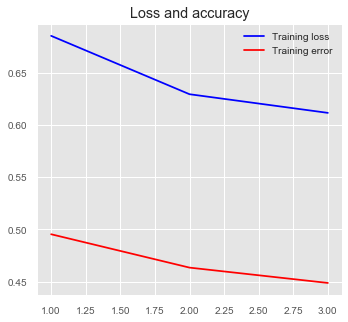

In [46]:

plot_history(history)